 #                           Police Shooting Cases In The USA 2013-2019

---



---



In [2]:
import numpy as np 
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/MPVDataset (3).csv")



* ###  Reviewing the columns, dropping the unnecessary ones and renaming some of them to make the dataset more readable




In [4]:
list(df.columns)

["Victim's name",
 "Victim's age",
 "Victim's gender",
 "Victim's race",
 'URL of image of victim',
 'Date of Incident (month/day/year)',
 'Street Address of Incident',
 'City',
 'State',
 'Zipcode',
 'County',
 'Agency responsible for death',
 'Cause of death',
 'A brief description of the circumstances surrounding the death',
 'Official disposition of death (justified or other)',
 'Criminal Charges?',
 'Link to news article or photo of official document',
 'Symptoms of mental illness?',
 'Unarmed',
 'Alleged Weapon (Source: WaPo)',
 'Alleged Threat Level (Source: WaPo)',
 'Fleeing (Source: WaPo)',
 'Body Camera (Source: WaPo)',
 'WaPo ID (If included in WaPo database)',
 'Off-Duty Killing?',
 'Geography',
 'ID']

In [5]:
df.drop(['URL of image of victim','Street Address of Incident','Zipcode',
         'A brief description of the circumstances surrounding the death',
         'Link to news article or photo of official document','WaPo ID (If included in WaPo database)'],
         axis='columns', inplace=True)

In [6]:
df.rename(columns = {'Date of Incident (month/day/year)' : 'Date',
                     "Victim's name": "Victims",
                     "Victim's race": "Race",
                     "Victim's gender": 'Gender',
                     "Victim's age":'Age',
                     "Symptoms of mental illness?": "Mental_illness",
                     'Official disposition of death (justified or other)': "Justified",
                     'Cause of death':"Death_cause"},
           inplace = True)

In [7]:
df["Death_cause"].unique()

array(['Gunshot', 'Taser', 'Asphyxiated', 'Gunshot, Taser', 'Vehicle',
       'Beaten', 'Physical Restraint', 'Tasered',
       'Taser, Pepper spray, beaten', 'Taser, Beaten',
       'Taser, Pepper Spray, Beaten', 'Other', 'Pepper Spray', 'Bean bag',
       'Gunshot, Taser, Pepper spray', 'Gunshot, Stabbed',
       'Taser, Physical Restraint', 'Gunshot, Vehicle',
       'Physical restraint', 'Baton, Pepper Spray, Physical Restraint',
       'Bomb', 'Gunshot, Pepper Spray', 'Taser, Baton',
       'Gunshot, Police Dog', 'Gunshot, Unspecified Less Lethal Weapon',
       'Gunshot, Taser, Beanbag Shotgun', 'Gunshot, Taser, Baton',
       'Gunshot, Bean Bag Gun', 'Gunshot, Beanbag Gun',
       'Beaten/Bludgeoned with instrument', nan], dtype=object)

In [8]:
df["Death_cause"]=np.where(df["Death_cause"].str.contains("Gunshot",case=False,na=False),'Gunshot',df["Death_cause"])
df["Death_cause"]=np.where(df["Death_cause"].str.contains("Taser",case=False,na=False),'Taser',df["Death_cause"])




*   ### Checking for duplicated values


In [9]:
df.ID.duplicated().unique()

array([False])



*   ### Checking for NA-s



In [10]:
df.isna().sum()

Victims                                   1
Age                                      68
Gender                                    9
Race                                      1
Date                                      1
City                                      7
State                                     1
County                                   16
Agency responsible for death             17
Death_cause                               1
Justified                                 0
Criminal Charges?                         1
Mental_illness                           12
Unarmed                                   1
Alleged Weapon (Source: WaPo)             1
Alleged Threat Level (Source: WaPo)    2384
Fleeing (Source: WaPo)                    1
Body Camera (Source: WaPo)                0
Off-Duty Killing?                      7441
Geography                                 1
ID                                        1
dtype: int64

In [11]:
df.dropna(subset=['Date','Victims'], inplace=True)
df.isna().sum()

Victims                                   0
Age                                      67
Gender                                    8
Race                                      0
Date                                      0
City                                      6
State                                     0
County                                   15
Agency responsible for death             16
Death_cause                               0
Justified                                 0
Criminal Charges?                         0
Mental_illness                           11
Unarmed                                   0
Alleged Weapon (Source: WaPo)             0
Alleged Threat Level (Source: WaPo)    2383
Fleeing (Source: WaPo)                    0
Body Camera (Source: WaPo)                0
Off-Duty Killing?                      7440
Geography                                 0
ID                                        0
dtype: int64



*  ### Checking for unique values for each column



In [12]:
column_values = df[["Gender", "Race","Unarmed","Death_cause"]].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Male' 'White' 'Allegedly Armed' 'Gunshot' 'Hispanic' 'Unarmed' 'Taser'
 'Black' 'Unknown race' 'Female' 'Vehicle' 'Asian' 'Unclear' 'Asphyxiated'
 'Native American' 'Beaten' 'Physical Restraint' 'Pacific Islander'
 'Other' 'Pepper Spray' 'Unknown' 'Bean bag' 'Transgender'
 'Physical restraint' 'Baton, Pepper Spray, Physical Restraint' 'Bomb'
 'Unknown Race' nan 'Beaten/Bludgeoned with instrument']



*  Checking data types





In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7666 entries, 0 to 7665
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Victims                              7666 non-null   object 
 1   Age                                  7599 non-null   object 
 2   Gender                               7658 non-null   object 
 3   Race                                 7666 non-null   object 
 4   Date                                 7666 non-null   object 
 5   City                                 7660 non-null   object 
 6   State                                7666 non-null   object 
 7   County                               7651 non-null   object 
 8   Agency responsible for death         7650 non-null   object 
 9   Death_cause                          7666 non-null   object 
 10  Justified                            7666 non-null   object 
 11  Criminal Charges?             

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

# Data Visualization

At first, I would like to look at the general tendency of police shootings during the last years.

In [15]:
import plotly.express as px

df2 = pd.DataFrame(df, columns = ['Victims','Date',"Race"])
df2['Date'] = pd.to_datetime(df2['Date'])

df_grouped = (
    df2.groupby(
        # normalize all dates to start of month
        df2['Date'].astype('datetime64[M]')
    )['Victims'].count().rename('Count').to_frame()
)

In [16]:
df = df.merge(df_grouped, on='Date', how='outer')
df.head()

,Victims,Age,Gender,Race,Date,City,State,County,Agency responsible for death,Death_cause,Justified,Criminal Charges?,Mental_illness,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),Off-Duty Killing?,Geography,ID,Count
0,Andrew L. Closson,21,Male,White,2013-01-01,Gordon,WI,Douglas,Douglas County Sheriff's Office,Gunshot,Justified,No known charges,Drug or alcohol use,Allegedly Armed,gun,NaN,Unknown,Unknown,NaN,Rural,5.0,105.0
1,Christopher Tavares,21,Male,Hispanic,2013-01-01,Pueblo,CO,Pueblo,Pueblo Police Department,Gunshot,Justified,No known charges,No,Allegedly Armed,gun,NaN,Unknown,Unknown,NaN,Suburban,4.0,105.0
2,Andrew Layton,26,Male,White,2013-01-01,Mankato,MN,Blue Earth,Mankato Department of Public Safety,Taser,Unreported,No known charges,No,Unarmed,unarmed,NaN,Unknown,Unknown,NaN,Suburban,6.0,105.0
3,Abel Gurrola,26,Male,Hispanic,2013-01-01,Bakersfield,CA,Kern,Bakersfield Police Department,Gunshot,Justified,No known charges,No,Allegedly Armed,gun,NaN,Unknown,Unknown,NaN,Urban,3.0,105.0
4,Tyree Bell,31,Male,Black,2013-01-01,Omaha,NE,Douglas,Omaha Police Department,Gunshot,Justified,No known charges,Yes,Allegedly Armed,gun,NaN,Unknown,Unknown,NaN,Urban,2.0,105.0


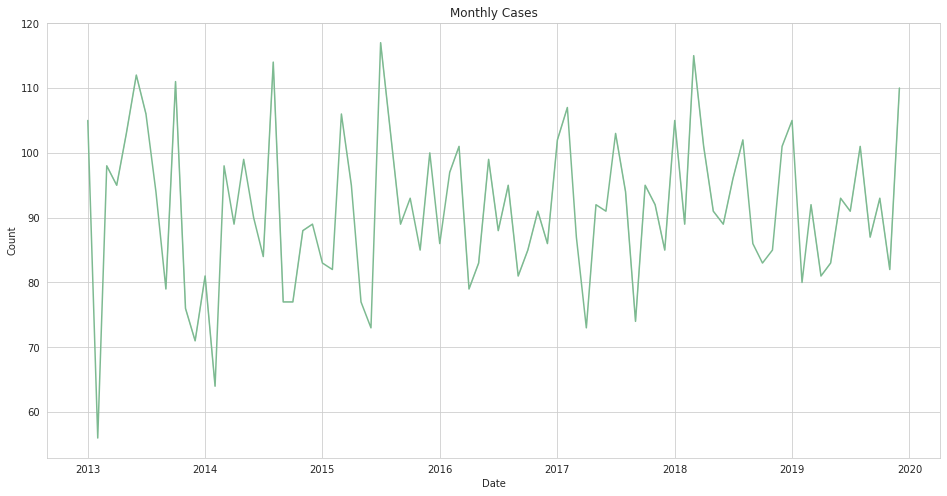

In [17]:
sns.set_style('whitegrid')
sns.set_palette('crest')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.title('Monthly Cases')
sns.lineplot(data=df, x="Date", y="Count",legend='full')
plt.show()

Considering a monthly period over these 7 years, we can see that in the half of 2013,2014 and 2015, at the beginning of 2018 we reached some peaks of about more than 110 cases in a month. 

We can observe this tendence for each race and also for some geographical areas separately.


In [18]:
df=df.drop(df[(df['Race'] == 'Unknown race')| (df['Race']=='Unknown Race')].index)
df=df.drop(df[(df["Age"]=="Unknown")| (df['Age']=='40s')].index)
df=df.drop(df[df['Geography']=='Unknown'].index)
df=df.drop(df[df['Gender']=='Unknown'].index)
df = df[df["Mental_illness"].isin(["Yes", "No","Drug or alcohol use"])]
df["Age"] = pd.to_numeric(df["Age"])

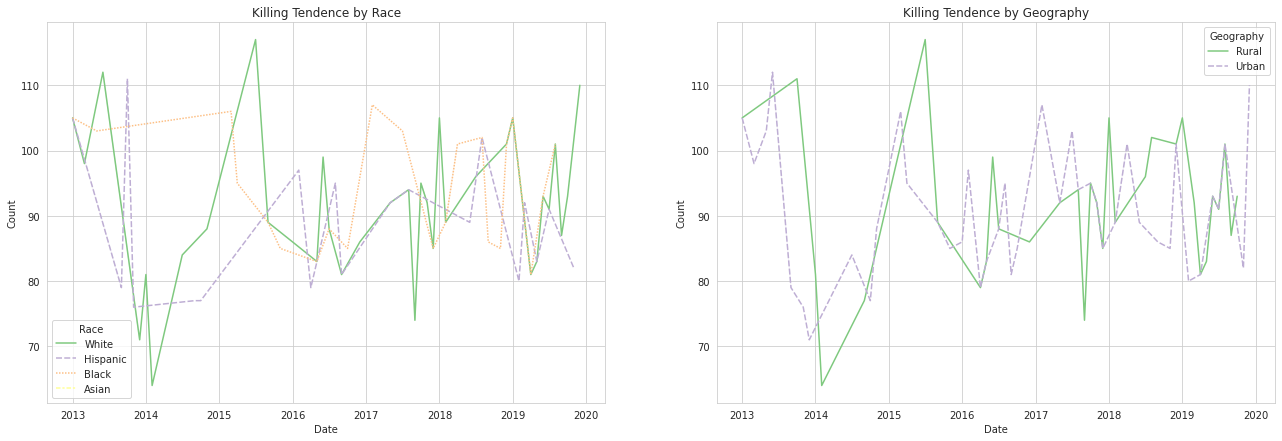

In [19]:
sns.set_palette('Accent')
df_n=df
df_n=df_n[df_n["Race"].isin(["White", "Black", "Hispanic", "Asian"])]
df_n=df_n[df_n['Geography'].isin(['Rural','Urban'])]

fig, ax =plt.subplots(1,2, figsize=(22, 7), sharex=True)

sns.lineplot(data=df_n, x="Date", y="Count",hue="Race",legend='auto',style='Race',ax=ax[0])
sns.lineplot(data=df_n, x="Date", y="Count",hue="Geography",legend='brief',style="Geography",ax=ax[1])

ax[0].set_title('Killing Tendence by Race')
ax[1].set_title('Killing Tendence by Geography')

plt.show()




*   ### Now let's observe killing cases for each state during 2013-2019.




In [20]:
import plotly.express as px
df_new=df
df_new = pd.DataFrame(df_new, columns = ['Victims','Date',"Race","State"])
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['Date']=df_new['Date'].astype('datetime64[M]')

In [21]:
df_new = df_new.groupby(['State', 'Date']).count().reset_index()[['State','Date','Victims']]
df_new.head()

,State,Date,Victims
0,AK,2013-01-01,1
1,AK,2014-03-01,1
2,AK,2015-02-01,1
3,AK,2015-09-01,2
4,AK,2015-10-01,1


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5, 58.5, 60.5, 62.5, 64.5,
        66.5, 68.5, 70.5, 72.5, 74.5, 76.5, 78.5, 80.5, 82.5]),
 <a list of 42 Text major ticklabel objects>)

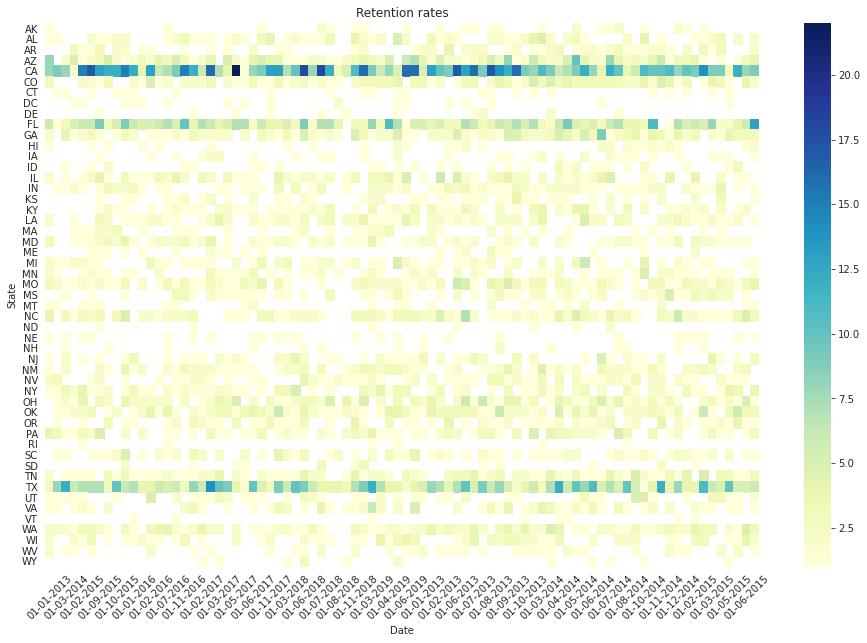

In [22]:
plt.figure(figsize=(16, 10))
plt.title('Retention rates')

df_h = df_new.pivot(index = 'State', columns = 'Date', 
                   values = 'Victims')

ax=sns.heatmap(df_h, cmap = 'YlGnBu')
ax.set_xticklabels(df_new['Date'].dt.strftime('%d-%m-%Y'))
plt.xticks(rotation = 45)

From this heatmap we can see that 3 States (CA, FL,TX) are dominant by the 
police killing rates. And also color transitions show us how the rates changed over the time in each State.

As we know, discrimination is one of the most disscussed issues in our society. Let's observe wheter the USA police actions are discriminatory based on people's racial and ethnic groups.

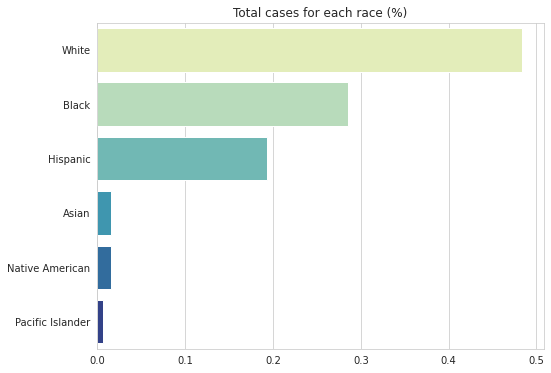

In [23]:
count = df.Race.value_counts(normalize=True)
count.index =['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Pacific Islander']

f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count.index, x=count.values,palette="YlGnBu")
ax.set_title('Total cases for each race (%)');

As we see from this chart the most killed race are whites, but here the race shares in USA aren't taken into consideration. So I took information about the race shares to get more accurate information.

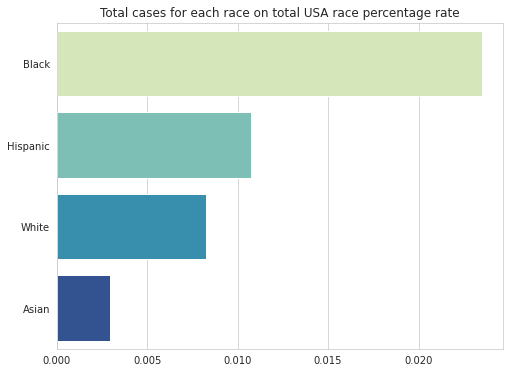

In [24]:
df = df[df["Race"].isin(["White", "Black", "Hispanic", "Asian"])]

share_race_usa_2019 = pd.Series([60.0, 12.4, 18.4, 5.6], index=['White','Black','Hispanic','Asian'])

count = df.Race.value_counts(normalize=True)
count.index = ['White', 'Black', 'Hispanic', 'Asian']

count_races = count / share_race_usa_2019
count_races = count_races.sort_values(ascending=False)
f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count_races.index, x=count_races.values, palette='YlGnBu')
ax.set_title('Total cases for each race on total USA race percentage rate');

Now the picture changed. We see that it's blacks who are mostly killed by Police.

Now, let's look at the rates of armed people in the killed ones


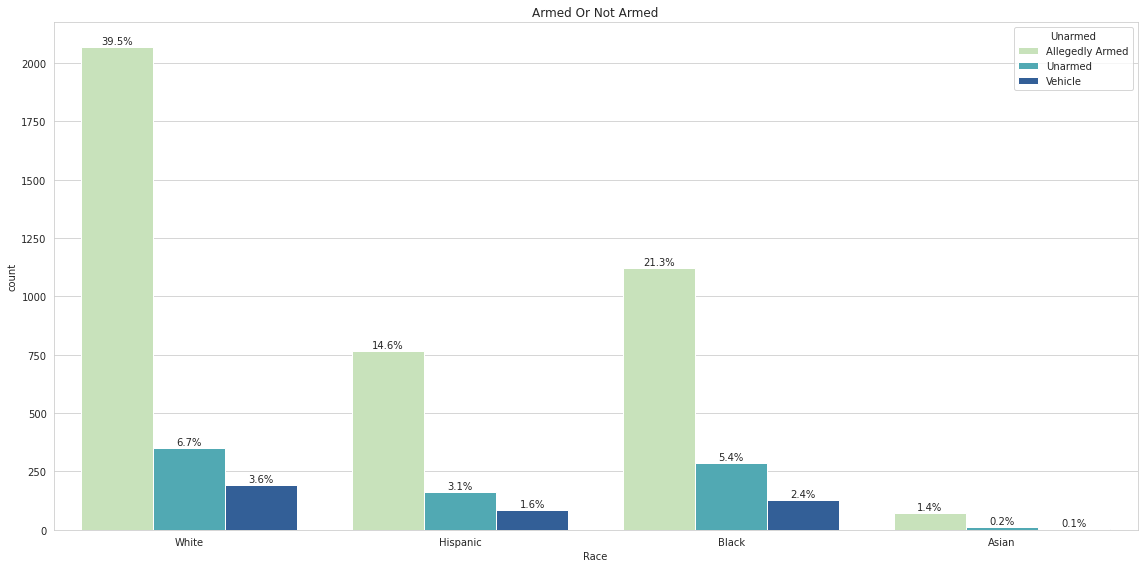

In [25]:
df = df[df["Unarmed"].isin(["Allegedly Armed", "Unarmed", "Vehicle"])]

plt.figure(figsize=(16, 8))
plt.title('Armed Or Not Armed')
ax=sns.countplot(x="Race", hue="Unarmed",palette = "YlGnBu", data=df)

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

From this plot we see that most killed people were armed.


In [26]:
import plotly.express as px

fig = px.parallel_categories(df, dimensions=['Gender', 'Race', 'Unarmed','Mental_illness'],
                color="Age", color_continuous_scale=px.colors.sequential.YlGnBu)
fig.show()

From this plot we can get a lot of information about the age, gender, race, mental ilness of victims.

Wee see that the victims are mostly of average age. But among Black people younger victims are more than in other Races. What is more, we see that the majority of victims are male. Most vistims had no any mental illness.

We can combine all those informations and observe how many people in each Race/ Gender were armed or unarmed, how many of them had mental ilness or used alcohol, etc.



In [27]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [32]:
df.dropna(subset=['Age',], inplace=True)

In [35]:
sns.set_style('ticks')
import seaborn as sns
import plotly.express as px


df = df[df["State"].isin(['CA', 'FL', 'TX'])]
df = df[df["Race"].isin(["White", "Black", "Hispanic", "Asian"])]


fig = px.sunburst(
    data_frame=df,
    path=["Unarmed","Race","Death_cause"],
    maxdepth=-1,
    color="Age",
    color_continuous_scale=px.colors.sequential.YlGnBu,
    #color_discrete_map={'Male':'	light yellow', 'Female':'light green'},
    # hover_data={"Victim's gender": False, "id":False, "labels":False},  # (Plotly version 4.8.0 or higher)
)

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

Here we see that all allegedly armed victims were killed by Gunshot. And in general, for the majority the cause of death was gunshot.

We also see that Black victims were younger than the others.




### To conclude, I can say that my visualizations show that there is racially motivated violence against black people in Police actions and that's why some social movements are created(such as Blck Lives Matter(BLM)) to protest against this phenomenon.  

### Thank you!